#### Stock return expectations and uncertainty

Suppose you are an active portfolio manager trying to incorporate your expectations about future returns into your portfolio construction. For simplicity, we will assume you can invest in two stocks A and B that, on average (i.e. before taking your expectations based on private information into account), deliver the same returns, and that you possess information only about B.

When constructing your portfolio, you will face two sources of risk: (i) your expectations may be wrong, (ii) even if your expectations are correct, the realized returns differ from their expected values.

For all questions, consider time series comprising 50 years of simulated data of monthly observations. When you are asked to simulate returns, always do so for 1000 random draws.

1. Consider a base case where you have no information about future returns. Suppose the unconditional expectation for both stocks is a monthly return of 1% and a standard deviation of 10%, with normally distributed returns that are uncorrelated with each other. Simulate returns of portfolios with proportions invested in B of 50, 60, 70, 80, 90, 100% (i.e. you implicitly rebalance your portfolio every month) and compute the mean and standard deviation of the total portfolio return observed after 50 years.

In [7]:
import numpy as np

months = 600 #50 years * 12 Months


def simulation (weightA,weightB,mean,std):
    mean_result = np.zeros([600,1])
    std_result = np.zeros([600,1])
    results = np.zeros([1000,600])
    for i in range(600):
        retr = np.random.normal(mean,std,(1000,2))
        for row in range(1000):
            portfolio_return = weightA*retr[row][0] + weightB*retr[row][1]
            results[row][i] = portfolio_return

    #print(np.shape(results))
    for j in range(600):
        a = np.mean(results[:][j])
        b = np.std(results[:][j])
        mean_result[j] = a
        std_result[j] = b
    #print(np.shape(mean_result))
    #print(np.shape(std_result))

    return(mean_result,std_result,)
            
simulation(0.5,0.5,0.01,0.1)


    

(array([[0.00601392],
        [0.01052005],
        [0.00888216],
        [0.01604793],
        [0.01380929],
        [0.00677258],
        [0.00916566],
        [0.00627405],
        [0.00635246],
        [0.00652346],
        [0.0091777 ],
        [0.0125974 ],
        [0.0068482 ],
        [0.01147676],
        [0.00743653],
        [0.00991604],
        [0.01180834],
        [0.00642121],
        [0.01412331],
        [0.00851068],
        [0.01185571],
        [0.01205809],
        [0.00690287],
        [0.00460242],
        [0.01214462],
        [0.00849421],
        [0.01181439],
        [0.00685727],
        [0.01072296],
        [0.00745352],
        [0.01173593],
        [0.00809486],
        [0.01265874],
        [0.01248824],
        [0.01176003],
        [0.00823721],
        [0.01451308],
        [0.01164192],
        [0.00083445],
        [0.01225541],
        [0.00383804],
        [0.00779599],
        [0.00147155],
        [0.01097443],
        [0.00935404],
        [0

2. Now assume that you have correct expectations, such that only the second risk  mentioned above matters ((ii) even if your expectations are correct, the realized returns differ from their expected values). Suppose your expectation for the return of B is (i) either 0.5 or 1.5%, (ii) either 0 or 2%. Please simulate portfolio returns as follows: if the expected return of B is greater (smaller) than 1%, invest 50, 60, 70, 80, 90, 100% (50, 40 , 30, 20, 10%) in B.

For each case, compute the mean and standard deviation of the total portfolio return.

In [21]:
month = 600
portfolios = 1000

def simulation2 (commit, choice = 1):#commit has to be between 0 and 0.5, choice 1= expected returns 0.5% and 1.5%, else 0% and 2%
    mean_result = np.zeros([600,1])
    std_result = np.zeros([600,1])
    results = np.zeros([1000,600])
    meanA = 0.01
    std = 0.1
    all_weights_B = np.zeros([600,1])
    if choice == 1:
        expect = [0.005, 0.015]
    else:
        expect = [0.00, 0.02]
    startweightB = 0.5

    for i in range(month):
        meanB = np.random.choice(expect)
        retrA = np.random.normal(meanA,std,(1000,1))
        retrB = np.random.normal(meanB,std,(1000,1))

        if meanB > 0.01:
            commit = commit + 0.1
            if commit > 0.5:
                commit = 0.5
            weightB = startweightB + commit
            all_weights_B[i] = weightB 
        else:
            commit = commit - 0.1
            if commit < 0:
                commit = 0
            weightB = startweightB - commit
            all_weights_B[i] = weightB
        weightA = 1 - weightB
        #print(weightB)
        #print(weightA)
        for row in range(portfolios):
            portfolio_return = weightA*retrA[row] + weightB*retrB[row]
            results[row][i] = portfolio_return
    for j in range(month):
        a = np.mean(results[:][j])
        b = np.std(results[:][j])
        mean_result[j] = a
        std_result[j] = b
    return(mean_result,std_result,all_weights_B)
simulation2(0)



(array([[0.01010595],
        [0.0077671 ],
        [0.01298561],
        [0.00479976],
        [0.00723022],
        [0.01561663],
        [0.01181388],
        [0.01750759],
        [0.00986454],
        [0.0151548 ],
        [0.0103378 ],
        [0.00924687],
        [0.0130457 ],
        [0.01620162],
        [0.01494158],
        [0.01105213],
        [0.00685386],
        [0.01326977],
        [0.01077412],
        [0.01231869],
        [0.00342661],
        [0.01685889],
        [0.01005343],
        [0.01068233],
        [0.0085154 ],
        [0.01385687],
        [0.01230462],
        [0.01756898],
        [0.00978821],
        [0.01010661],
        [0.01539783],
        [0.01284458],
        [0.00919502],
        [0.01166063],
        [0.01365102],
        [0.00946508],
        [0.00820313],
        [0.01182499],
        [0.01274429],
        [0.00491987],
        [0.00961335],
        [0.00998177],
        [0.00520696],
        [0.01433147],
        [0.01227716],
        [0

3. Here, we will introduce the second dimension of uncertainty: your expectations may be incorrect. You will use the same expectations and investment decisions as in 2., though your expectations may be false. Consider the cases where your expectation is correct only 90, 80, 70, 60% of the time. E.g., if your expectation is a return of 2%, the true expectation will be 0% with a probability of 10, 20, 30, 40%.

Repeat the calculations from 2. for each amount of uncertainty about the true expectation.

In [23]:
def simulation3 (commit,choice,prob = (0.9,0.1)):#commit has to be between 0 and 0.5
    mean_result = np.zeros([600,1])
    std_result = np.zeros([600,1])
    results = np.zeros([1000,600])
    meanA = 0.01
    std = 0.1
    all_weights_B = np.zeros([600,1])
    if choice == 1:
        expect = [0.005, 0.015]
    else:
        expect = [0.00, 0.02]
    startweightB = 0.5

    for i in range(month):
        meanB = np.random.choice(expect,size = 2, replace = False)#first value of meanB is the investors expected return. The second value is just the other value from the possible mean expected returns
        meanBreal = np.random.choice(meanB,size = 1, replace = False, p = prob)#Takes with input prob the investors expected return, with 1-prob takes the investors expected return as the wrong mean return
        if meanB[0] == meanBreal[0]:
            retrB = np.random.normal(meanB[0],std,(1000,1))
        else:
            retrB = np.random.normal(meanBreal[0],std,(1000,1))#in this case meanBreal[0] = meanB[1]
        
        retrA = np.random.normal(meanA,std,(1000,1))

        if meanB[0] > 0.01:
            commit = commit + 0.1
            if commit > 0.5:
                commit = 0.5
            weightB = startweightB + commit #expected return is bigger than 1%, so we increase portfolio proportion held in B by our "commit" amount
            all_weights_B[i] = weightB
        else:
            commit = commit - 0.1
            if commit < 0:
                commit = 0
            weightB = startweightB - commit #expected return is smaller than 1%, so we decrease portfolio proportion held in B by our "commit" amount
            all_weights_B[i] = weightB
        weightA = 1 - weightB
        for row in range(portfolios):
            portfolio_return = weightA*retrA[row] + weightB*retrB[row]
            results[row][i] = portfolio_return
    for j in range(month):
        a = np.mean(results[:][j])
        b = np.std(results[:][j])
        mean_result[j] = a
        std_result[j] = b
    return(mean_result,std_result,all_weights_B)
simulation3(0, 1, (0.9,0.1))
simulation3(0, 1, (0.8,0.2))
simulation3(0, 1, (0.7,0.3))
simulation3(0, 1, (0.6,0.4))
simulation3(0, 1, (0.5,0.5))


(array([[ 0.00890858],
        [ 0.01205616],
        [ 0.00948026],
        [ 0.01597119],
        [ 0.00542418],
        [ 0.00887379],
        [ 0.01270103],
        [ 0.0120399 ],
        [ 0.01018675],
        [ 0.01194377],
        [ 0.00267362],
        [ 0.00903982],
        [ 0.00991964],
        [ 0.0124163 ],
        [ 0.00724238],
        [ 0.00825885],
        [ 0.01164886],
        [ 0.01185818],
        [ 0.00979841],
        [ 0.00830126],
        [ 0.00825622],
        [ 0.00916465],
        [ 0.01069179],
        [ 0.0110135 ],
        [ 0.00880698],
        [ 0.00990517],
        [ 0.01260125],
        [ 0.00990711],
        [ 0.00778405],
        [ 0.01176696],
        [ 0.00920617],
        [ 0.01014887],
        [ 0.01356134],
        [ 0.01268447],
        [ 0.00415498],
        [ 0.00832851],
        [ 0.01186711],
        [ 0.00635871],
        [ 0.01082628],
        [ 0.00954366],
        [ 0.01312731],
        [ 0.01503245],
        [ 0.01418947],
        [ 0

4. For the cases of no and maximum uncertainty about your expectations, plot the size of your active position (i.e. the magnitude of the deviation from 50%) against the mean total return.

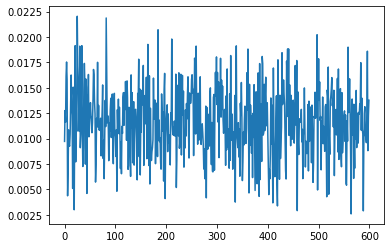

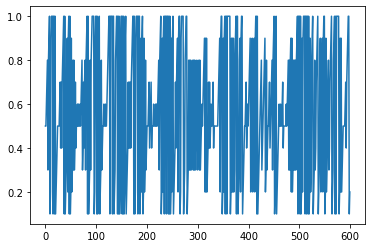

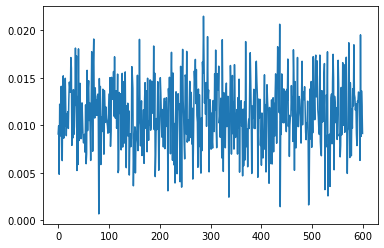

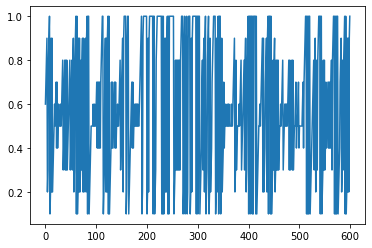

In [26]:
import matplotlib.pyplot as plt

sim2 = simulation2(0) # no uncertainty about our expectations
sim3 = simulation3(0, 1, (0.9,0.1)) # 90% uncertainty about our expectations

# Plotting the results
plt.plot(sim2[0]) # Plotting the means
plt.show()
plt.plot(sim2[2]) # Plotting B weight 
plt.show()

plt.plot(sim3[0])
plt.show()
plt.plot(sim3[2])
plt.show()